[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
1.0


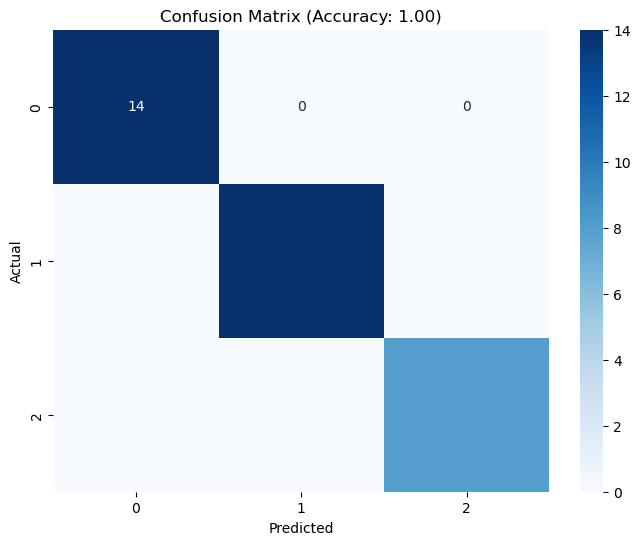

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("wine.csv")

# Separate the dependent variable (Wine) from the independent variables
X = data.iloc[:, 1:]  # Independent variables
Y = data["Wine"]      # Dependent variable

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train a Logistic Regression model on the PCA-transformed data
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train_pca, Y_train)

# Predict the labels for the test set
Y_pred = classifier.predict(X_test_pca)

# Calculate and display the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
# Display accuracy score
accuracy = accuracy_score(Y_test, Y_pred)
print(accuracy)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (Accuracy: {accuracy:.2f})")
plt.show()